In [ ]:
"""
Dự đoán khách hàng có rời bỏ dịch vụ hay không
Sử dụng LogicticRegression
+ 8000 row là chưa rời bỏ dịch vụ
+ 2000 row là rời bỏ dịch vụ
   => Data imbalence

   ? Cần xử lý ./ 
   
"""

In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# # Cài đặt 
# !pip install xgboost
# !pip install imbalanced-learn

In [2]:
# Đọc dữ liệu từ file
customer_data = pd.read_csv("Churn_Modelling.csv")
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


0    7963
1    2037
Name: Exited, dtype: int64


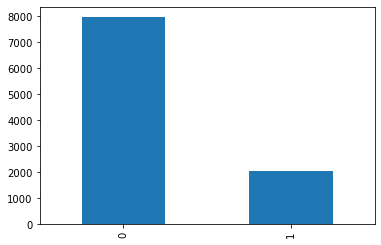

In [4]:
customer_data['Exited'].value_counts().plot(kind="bar")
print(customer_data['Exited'].value_counts())

In [5]:
# Train nhu binh thuong
# không liên quan đến việc training models./
dataset = customer_data.drop(["RowNumber","Surname","CustomerId"], axis=1)

In [7]:
# Tao ra onehot
# các dữ liệu bằng chữ như male, female =>  model không hiểu 
# Convert sang dạng số: 0-male; 1-female

# Áp dụng cho toàn bộ dataset
dataset_dummy = pd.get_dummies(dataset,drop_first=True)


# Data target
y = dataset_dummy['Exited']
# Data train thì xóa cột target (Exited)
X = dataset_dummy.drop(["Exited"],axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

# Đưa data về khoảng 0 đến 1 | models hội tụ nhanh hơn
scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])


#Performance evaluation
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

X_train.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,0.672,0.189189,0.6,0.000000,0.333333,1,1,0.895550,0,0,1
1561,0.564,0.324324,0.4,0.476786,0.333333,1,1,0.980029,1,0,1
1670,0.418,0.081081,0.3,0.457317,0.000000,1,0,0.429261,0,1,1
6087,0.422,0.121622,0.9,0.540606,0.000000,1,0,0.765408,0,0,0
6669,0.334,0.513514,0.9,0.566554,0.000000,0,0,0.197107,0,0,1


In [8]:
# Train model voi imabalance data

# Khoi tao
model = LogisticRegression() 

# Fit voi du lieu trian
model.fit(X_train, y_train)

# Du doan du lieu test
y_pred = model.predict(X_test)

# in ra ket qua
print_scores( y_test, y_pred)


"""
+ Các thông số precision, recall, f1-score của lớp 0 thì ổn
+ Các thông số precision, recall, f1-score của lớp 1 thì rất thấp: chỉ đoán được 19% (recall) số lượng khách rời bỏ dịch vụ 
"""


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [9]:
"""
+ Sử dụng class-weights: 0,29 > 0,50
"""
# Train model voi imabalance data

# Khoi tao
model = LogisticRegression(class_weight="balanced") 

# Fit voi du lieu trian
model.fit(X_train, y_train)

# Du doan du lieu test
y_pred = model.predict(X_test)

# in ra ket qua
print_scores( y_test, y_pred)


              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.74      2000



In [10]:
"""
Ensemble & Boosting

+ Random Forest

"""
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Khoi tao model random forest (n_estimators: số cây)

model_RFC = RandomForestClassifier(n_estimators=200, random_state=42) 

# Fit vao du lieu train
model_RFC.fit(X_train, y_train)

# Du doan 
y_pred = model_RFC.predict(X_test)

# In ket qua
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [11]:
"""
Ensemble & Boosting

+ GradientBoosting

"""
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate=0.01, random_state=42,n_estimators=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.84      0.33      0.48       393

    accuracy                           0.86      2000
   macro avg       0.85      0.66      0.70      2000
weighted avg       0.85      0.86      0.83      2000



In [12]:
"""
Ensemble & Boosting

+ xgboost

"""
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)


y_pred = model.predict(X_test)
print_scores( y_test, y_pred)



              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.84      0.33      0.48       393

    accuracy                           0.86      2000
   macro avg       0.85      0.66      0.70      2000
weighted avg       0.85      0.86      0.83      2000



In [13]:
dataset["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [14]:
dataset_0 = dataset[dataset.Exited==0]
dataset_1 = dataset[dataset.Exited==1]
dataset_0.shape, dataset_1.shape

((7963, 11), (2037, 11))

In [17]:
"""

+ Giảm dataset_0 về bằng với dataset_1
+ Rus (Random under sampling)
+ sample(size): lấy ngẫu nhiên với size 
"""
size = dataset_1.shape[0]
dataset_0_rus = dataset_0.sample(size)
dataset_0_rus.shape

(2037, 11)

In [18]:
"""
+ Nối lại 2 tập data bằng size - 2037 (0 và 1)

"""
dataset_random_under = pd.concat([dataset_0_rus,dataset_1])
dataset_random_under.shape

(4074, 11)

In [19]:
# Như cũ
dataset_dummy = pd.get_dummies(dataset_random_under,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])


model = LogisticRegression() #Instantiating the algorithm class and unpacking parameters if any
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores( y_test, y_pred)


              precision    recall  f1-score   support

           0       0.75      0.72      0.73       443
           1       0.68      0.71      0.70       372

    accuracy                           0.72       815
   macro avg       0.71      0.72      0.71       815
weighted avg       0.72      0.72      0.72       815



In [20]:
# NearMiss
# Near Miss
"""
NearMiss tự động undersampling :))
> Quá nhanh 

"""

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']


from imblearn.under_sampling import NearMiss
nm = NearMiss()

X_res, y_res = nm.fit_resample(X,y)
X_res.shape, y_res.shape

((4074, 11), (4074,))

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])


model = LogisticRegression() #Instantiating the algorithm class and unpacking parameters if any
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       443
           1       0.96      0.80      0.87       372

    accuracy                           0.89       815
   macro avg       0.90      0.88      0.89       815
weighted avg       0.90      0.89      0.89       815



In [22]:
# Random Oversampling
"""
+ Sinh dữ liệu từ lớp thiểu số để bằng với lớp lớn
+ data 0: 7963
fit_resample
"""
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_ros, y_ros = ros.fit_resample(X,y)
X_ros.shape, y_ros.shape


((15926, 11), (15926,))

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])


model = LogisticRegression() #Instantiating the algorithm class and unpacking parameters if any
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1633
           1       0.70      0.71      0.70      1553

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



In [ ]:
"""
Nearmiss có kết quả tốt hơn OverSampling

"""

In [24]:
# SMOTE
"""
Sinh data./
"""
from imblearn.over_sampling import SMOTE

sm = SMOTE()

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_sm, y_sm = sm.fit_resample(X, y)
X_sm.shape, y_sm.shape


((15926, 11), (15926,))

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])


model = LogisticRegression() #Instantiating the algorithm class and unpacking parameters if any
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1633
           1       0.77      0.80      0.79      1553

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



In [ ]:
"""
Kết luận: Tùy vào bài toán mà ta dùng các kĩ thuật khác nhau

>>>> Ở bài này: NearMiss sẽ mang lại kết quả tốt nhất, nhưng đối với bài toán khác thì NM chưa chắc tốt đâu :v 
"""